In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.externals import joblib
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',10000)
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/normalizedoffense.csv')

In [3]:
df.head()

,eFG%,TS%,FTr,USG%,ORB%,OWS,TotalOff,Name
0,0.390573,0.460000,0.127585,0.509025,0.057902,0.186347,1.731432,A.J. Price
1,0.558595,0.626531,0.335511,0.285199,0.684728,0.193727,2.684290,Aaron Gray
2,0.357301,0.468571,0.215545,0.264440,0.162019,0.223247,1.691124,Aaron Mckie
3,0.545841,0.728776,0.584368,0.252708,0.606109,0.311808,3.029609,Adam Keefe
4,0.347874,0.354082,0.255389,0.196751,0.560425,0.140221,1.854742,Adonal Foyle


In [4]:
df1 = pd.read_csv('/Users/mattlee/GA-Capstone-Project/normalizedoffdf.csv')

In [5]:
df1.head()

,Name,Team,PPG,Games Played,MPG,FGM,FGA,FG%,FTM,FTA,FT%,3PM,3PA,3P%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,Year,NBATeam,CollegeName,Age at Draft,Weight at Draft,Height Inches,PER,WS,WS/48,BPM,VORP,TopSchool,TotalOff
0,A.J. Price,UConn,12.466667,33.000000,29.30,4.166667,10.10,0.410667,2.633333,3.600000,0.719000,1.50,4.166667,0.348,0.800,2.433333,3.233333,4.566667,1.066667,0.066667,2.300000,1.300000,2009.0,IND,University of Connecticut,22.5,193.0,74.0,11.66,4.4,0.0440,-2.98,-0.3,0,1.545085
1,Aaron Gray,PITT,8.750000,28.250000,18.40,3.425000,6.25,0.554250,1.900000,3.175000,0.590500,0.00,0.000000,0.000,2.275,3.975000,6.275000,1.175000,0.300000,1.025000,1.350000,1.975000,2007.0,CHI,University of Pittsburgh,22.3,280.0,85.0,12.82,5.5,0.0952,-1.32,0.3,0,2.490563
2,Al Horford,UF,9.866667,36.333333,25.50,3.766667,6.40,0.565333,2.433333,3.966667,0.612333,0.00,0.066667,0.000,2.300,5.500000,7.766667,1.633333,0.833333,1.700000,1.533333,2.433333,2007.0,ATL,University of Florida,20.8,246.0,82.0,18.16,34.6,0.1580,2.52,12.3,1,2.423414
3,Al-Farouq Aminu,WF,13.300000,31.000000,30.15,4.650000,9.80,0.481500,3.600000,5.200000,0.684500,0.40,1.550000,0.226,3.050,5.650000,8.700000,1.300000,1.150000,1.250000,2.650000,2.550000,2010.0,LAC,Wake Forest University,19.5,216.0,80.0,12.30,11.6,0.0652,-0.36,3.5,0,1.831858
4,Alec Burks,UCOL,18.450000,34.000000,30.80,6.100000,12.20,0.503000,5.650000,7.100000,0.798500,0.65,2.150000,0.322,2.100,3.500000,5.650000,2.300000,1.150000,0.350000,2.200000,2.350000,2011.0,UTA,University of Colorado,19.7,193.0,78.0,13.72,8.9,0.0738,-2.10,0.2,0,2.119826


In [6]:
df1.drop('TotalOff', axis = 1, inplace = True)

In [7]:
df2 = df1.merge(df[['Name','TotalOff']], on = 'Name', how = 'left')

In [10]:
df2.to_csv('normalizedoffdf.csv', index = False)

In [3]:
df3 = pd.read_csv('/Users/mattlee/GA-Capstone-Project/FEdf.csv')

In [21]:
df3.drop('TotalOff', axis = 1, inplace = True)

In [22]:
df4 = df3.merge(df2[['Name','TotalOff']], on = 'Name', how = 'left')

In [23]:
df4.to_csv('FEdf.csv', index = False)

In [2]:
df = pd.read_csv('/Users/mattlee/GA-Capstone-Project/FEdf1.csv')

**Feature Selection**

In [3]:
def skb(x,y,features):
    kbest = SelectKBest(score_func= mutual_info_regression,k = features)
    kbest_columns = kbest.fit_transform(x,y)
    mask = kbest.get_support() #list of booleans
    new_features = [] # The list of your K best features
    for bool, feature in zip(mask, x.columns):
        if bool:
            new_features.append(feature)
    dfkbest = pd.DataFrame(kbest_columns, columns = new_features)
    scores = zip(x.columns,list(kbest.scores_))
    return dfkbest, scores
#made a function that can manually iterate number of desired KBest features

In [4]:
df.columns

Index([u'Name', u'Team', u'PPG', u'Games Played', u'MPG', u'FGM', u'FGA',
       u'FG%', u'FTM', u'FTA', u'FT%', u'3PM', u'3PA', u'3P%', u'ORB', u'DRB',
       u'RPG', u'APG', u'SPG', u'BPG', u'TOV', u'PF', u'Year', u'NBATeam',
       u'CollegeName', u'Age at Draft', u'Weight at Draft', u'Height Inches',
       u'PER', u'WS', u'WS/48', u'BPM', u'VORP', u'TopSchool', u'Total',
       u'TotalWS', u'TotalWS48', u'TotalPCAWS', u'TotalPCAWS48', u'TotalDef',
       u'TotalPERWS', u'TotalPERWSBPM', u'TotalWSBPM', u'TotalWSBPMV',
       u'PERVORP', u'TotalWV', u'MPG3', u'FTMSR', u'3PMSR', u'ORBSR', u'DRBL',
       u'APGCR', u'SPGSR', u'TOVSR', u'Age at Draft SR', u'Height Inches C',
       u'TotalWSSR', u'TotalPCAWSSR', u'TotalPERWSSR', u'TotalWSBPMSR',
       u'TotalWSBPMVCR', u'PERVORPCR', u'Games Played 4', u'TotalOff',
       u'FTASR', u'FT%C', u'3PASR', u'3P%R', u'RPGSR'],
      dtype='object')

In [6]:
x = df[['PPG','Games Played 4','MPG3','FGM','FG%','FTMSR','FT%C','3PMSR','3P%','ORBSR','APGCR','SPGSR',
           'BPG','TOVSR','PF','TopSchool','Age at Draft SR','Weight at Draft','Height Inches C']]
y = df['TotalOff']

In [34]:
dfkbest, scores = skb(x,y,17)

In [35]:
scores

[('PPG', 0.023819951232362691),
 ('Games Played 4', 0.018348735933628735),
 ('MPG3', 0.0),
 ('FGM', 0.046674478958629528),
 ('FG%', 0.12269085010280767),
 ('FTMSR', 0.081443297937870529),
 ('FT%C', 0.04392391335404966),
 ('3PMSR', 0.027278740028634729),
 ('3P%', 0.020438503908605909),
 ('ORBSR', 0.11302474514880778),
 ('APGCR', 0.0),
 ('SPGSR', 0.0),
 ('BPG', 0.040927037434248081),
 ('TOVSR', 0.00034425909600477311),
 ('PF', 0.025283994403795695),
 ('TopSchool', 0.0),
 ('Age at Draft SR', 0.0),
 ('Weight at Draft', 0.11608203976686804),
 ('Height Inches C', 0.034666383240559817)]

In [36]:
dfkbest.columns

Index([u'PPG', u'Games Played 4', u'FGM', u'FG%', u'FTMSR', u'FT%C', u'3PMSR',
       u'3P%', u'ORBSR', u'SPGSR', u'BPG', u'TOVSR', u'PF', u'TopSchool',
       u'Age at Draft SR', u'Weight at Draft', u'Height Inches C'],
      dtype='object')

In [37]:
x = dfkbest

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.35)

In [39]:
rg = RidgeCV(alphas = [0.001, 0.01, 0.1, 1.0, 10])

In [40]:
rg.fit(x_train, y_train)
print rg.score(x_train, y_train)
print cross_val_score(rg,x, y)
print rg.score(x_test, y_test)

0.422880912774
[ 0.30797523  0.17290329  0.13707967]
0.423600633123


In [64]:
zipped = zip(dfkbest.columns,rg.coef_)
zipped.sort(key = lambda t: t[1], reverse = True)
zipped

[('FG%', 3.725623985271806),
 ('ORBSR', 0.33519382170965173),
 ('TopSchool', 0.18627738366061664),
 ('SPGSR', 0.18596358250700007),
 ('FTMSR', 0.1685090094050139),
 ('PPG', 0.099953335137456634),
 ('3PMSR', 0.054085468735593167),
 ('BPG', 0.013225191554546711),
 ('Weight at Draft', 0.0012864150758105097),
 ('Games Played 4', -7.4505805969238281e-08),
 ('Height Inches C', -5.5599957704544067e-07),
 ('Age at Draft SR', -0.0022259379093156895),
 ('PF', -0.17651875037368114),
 ('3P%', -0.21847235088770489),
 ('TOVSR', -0.22736687167528302),
 ('FGM', -0.26452708685175708),
 ('FT%C', -0.54088427678284745)]

In [73]:
coef = pd.DataFrame(rg.coef_,dfkbest.columns, columns = ['Coefficients'])
coef.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
FG%,3.725624e+00
ORBSR,3.351938e-01
TopSchool,1.862774e-01
SPGSR,1.859636e-01
FTMSR,1.685090e-01
PPG,9.995334e-02
3PMSR,5.408547e-02
BPG,1.322519e-02
Weight at Draft,1.286415e-03
Games Played 4,-7.450581e-08


In [70]:
rg.alpha_

0.01

In [72]:
rgpredict = (rg.predict(x_test))
pre = pd.DataFrame(rgpredict, columns = ['Predictions'])
forpredf = pd.DataFrame(y_test).reset_index(drop = True)
pre1 = pre.merge(forpredf, left_index=True, right_index=True)
pre1.head()

,Predictions,TotalOff
0,2.493228,2.054002
1,2.326191,2.068574
2,2.523909,2.548952
3,2.702432,2.885219
4,2.277809,1.948123


In [68]:
print 'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rgpredict))

RMSE: 0.429827346855


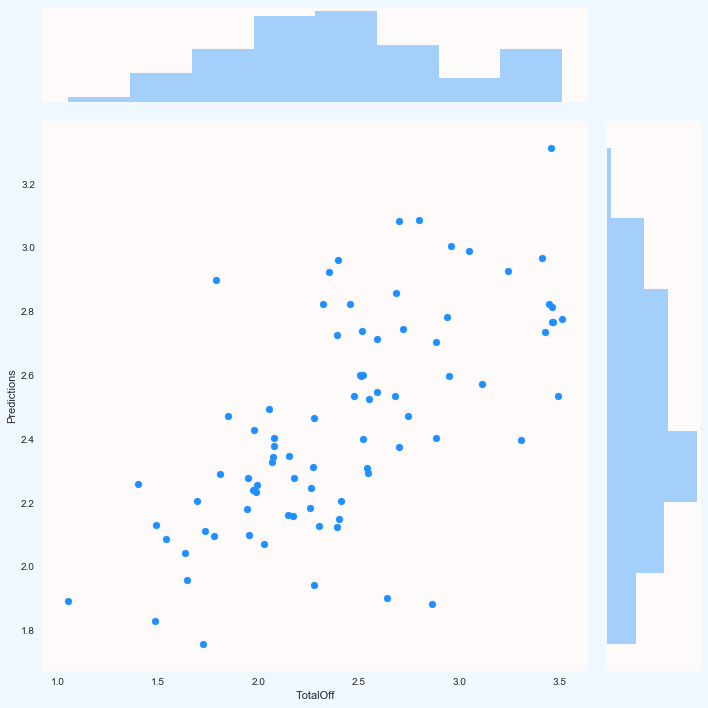

In [75]:
sns.set(rc={'axes.facecolor':'snow', 'figure.facecolor':'aliceblue','axes.grid':False})

sns.jointplot(x = 'TotalOff', y = 'Predictions', data = pre1, kind = 'scatter', 
              color = 'dodgerblue', stat_func = None, size = 10)

In [60]:
joblib.dump(rg, 'Offense_Ridge.pkl')

['Offense_Ridge.pkl']

In [41]:
gb = GradientBoostingRegressor()

In [42]:
params = {'learning_rate':[0.001,0.01,0.1,0.2,0.3],
         'n_estimators':[100],
         'max_depth':[1,5,10],
         'min_samples_split':[2,5,8],
         'min_samples_leaf':[1,3,5],
         'max_features':[0.4,'sqrt']}

In [43]:
gsgb = GridSearchCV(gb, params, n_jobs= -1)

In [44]:
gsgb.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'min_samples_leaf': [1, 3, 5], 'n_estimators': [100], 'max_features': [0.4, 'sqrt'], 'min_samples_split': [2, 5, 8], 'max_depth': [1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
gsgb.best_estimator_.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=5,
             min_samples_split=8, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [46]:
gsgb.best_estimator_.score(x_train, y_train)

0.54314334263212238

In [47]:
gsgb.best_estimator_.score(x_test, y_test)

0.36180119397523014

In [48]:
ln = LinearRegression()

In [49]:
gsln = GridSearchCV(ln,param_grid = {})

In [50]:
gsln.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
gsln.best_estimator_.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
gsln.best_estimator_.score(x_train, y_train)

0.4234691786418463

In [53]:
gsln.best_estimator_.score(x_test, y_test)

0.42206403186313124

In [65]:
zipped1 = zip(dfkbest.columns,gsln.best_estimator_.coef_)
zipped1.sort(key = lambda t: t[1], reverse = True)
zipped1

[('FG%', 4.0173243876951483),
 ('ORBSR', 0.34389570574740019),
 ('FTMSR', 0.18549459399474003),
 ('TopSchool', 0.18243424126494986),
 ('SPGSR', 0.18199629698068484),
 ('PPG', 0.095368833393335767),
 ('3PMSR', 0.086911839870226784),
 ('BPG', 0.011230847154947599),
 ('Weight at Draft', 0.0012600454624742685),
 ('Games Played 4', -9.2081644776062858e-08),
 ('Height Inches C', -6.3159185881289659e-07),
 ('Age at Draft SR', -0.0022316260983137326),
 ('PF', -0.18074955759271455),
 ('TOVSR', -0.20691949340022894),
 ('3P%', -0.23264837613849146),
 ('FGM', -0.26014710344712527),
 ('FT%C', -0.54502689105017565)]

In [62]:
joblib.dump(gsln.best_estimator_, 'Offense_LR.pkl')

['Offense_LR.pkl']

In [54]:
lass = LassoCV(alphas = [0.001, 0.01, 0.1, 1.0, 10])
gslass = GridSearchCV(lass,param_grid={})
gslass.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [55]:
gslass.best_estimator_.fit(x_train, y_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [56]:
print gslass.best_estimator_.score(x_train, y_train)
print gslass.best_estimator_.score(x_test, y_test)

0.417072658819
0.434771115973


In [66]:
zipped2 = zip(dfkbest.columns,gslass.best_estimator_.coef_)
zipped2.sort(key = lambda t: t[1], reverse = True)
zipped2

[('FG%', 2.9604524323153401),
 ('ORBSR', 0.30047400241855249),
 ('TopSchool', 0.18817489170741813),
 ('SPGSR', 0.16343446577522275),
 ('PPG', 0.1023203039103492),
 ('FTMSR', 0.10035175476169175),
 ('BPG', 0.018841254992986604),
 ('Weight at Draft', 0.001611297959990148),
 ('Games Played 4', -7.664293994681823e-08),
 ('Height Inches C', -5.7089337294642379e-07),
 ('Age at Draft SR', -0.0022242871642078922),
 ('3PMSR', -0.048829239053904863),
 ('3P%', -0.11212073383301155),
 ('PF', -0.15639979649633026),
 ('TOVSR', -0.21815536331714119),
 ('FGM', -0.2508324074008077),
 ('FT%C', -0.37385162965759883)]

In [63]:
joblib.dump(gslass.best_estimator_, 'Offense_LS.pkl')

['Offense_LS.pkl']

Below is just scrap work, please ignore
==

In [33]:
lr = LinearRegression()
score_dict = {}
for rng in range(1,19):
    dfkbest, scores = skb(x,y,rng)
    x_train, x_test, y_train, y_test = train_test_split(dfkbest, y,
                                                   test_size=0.30)
    modellr = lr.fit(x_train, y_train)
    score_dict[rng] = (modellr.score(x_train, y_train),modellr.score(x_test, y_test))
dfkbest, scores = skb(x,y,'all')
x_train, x_test, y_train, y_test = train_test_split(dfkbest, y,
                                                   test_size=0.35)
modellr = lr.fit(x_train, y_train)
score_dict['all'] = (modellr.score(x_train, y_train),modellr.score(x_test, y_test))
score_dict
#test out scores on how many features used

{1: (0.24183352636236533, 0.13595512587192038),
 2: (0.17125171153235108, 0.33127667264861116),
 3: (0.20613822107577517, 0.35974308084972184),
 4: (0.39684345673575205, 0.12306997490981596),
 5: (0.27537466045943348, 0.44972355223539606),
 6: (0.31408703315515685, 0.34870896888124692),
 7: (0.36683591154017581, 0.20304776682649661),
 8: (0.3206397265508677, 0.32081153679780072),
 9: (0.42964101677308969, 0.064060605057317588),
 10: (0.34705929702207095, 0.29505144452089549),
 11: (0.41636151543066968, 0.15800901034386994),
 12: (0.3595536246638128, 0.25584040793330298),
 13: (0.43686552761841546, 0.14237813058675819),
 14: (0.43354249075968715, -0.045470257714625983),
 15: (0.44517470553987565, 0.30296819268831621),
 16: (0.45745233834732446, 0.27681217672915603),
 17: (0.4161734810608318, 0.43248915542898292),
 18: (0.45141646267084196, 0.37625774630092335),
 'all': (0.48536290756508793, 0.23542822052074108)}